In [1]:
import pandas as pd
from db import DB

In [24]:
database = DB(filename = 'logs.sqlite3', dbtype = 'sqlite')

Indexing schema. This will take a second...finished!


In [25]:
database.tables

Refreshing schema. Please wait...done!


Schema,Table,Columns
public,log,"id, path, user_id, date"


In [40]:
log_df = database.tables.log.all()

In [41]:
log_df.head()

,id,path,user_id,date
0,1,/,3,2017-01-03T11:41:00
1,2,/pandas/,4,2017-01-03T11:37:00
2,3,/videos/,5,2017-01-03T10:47:00
3,4,/,2,2017-01-03T11:51:00
4,5,/python-para-zumbis/,5,2017-01-03T10:32:00


In [42]:
log_df.dtypes

id          int64
path       object
user_id     int64
date       object
dtype: object

In [43]:
log_df['date'] = pd.to_datetime(log_df['date'], format = '%Y-%m-%d %H:%M:%S.%f')

In [44]:
log_df.dtypes

id                  int64
path               object
user_id             int64
date       datetime64[ns]
dtype: object

In [45]:
log_df.head()

,id,path,user_id,date
0,1,/,3,2017-01-03 11:41:00
1,2,/pandas/,4,2017-01-03 11:37:00
2,3,/videos/,5,2017-01-03 10:47:00
3,4,/,2,2017-01-03 11:51:00
4,5,/python-para-zumbis/,5,2017-01-03 10:32:00


In [46]:
log_df.set_index(log_df.date, inplace=True)

In [47]:
log_df.head()

,id,path,user_id,date
date,,,,
2017-01-03 11:41:00,1,/,3,2017-01-03 11:41:00
2017-01-03 11:37:00,2,/pandas/,4,2017-01-03 11:37:00
2017-01-03 10:47:00,3,/videos/,5,2017-01-03 10:47:00
2017-01-03 11:51:00,4,/,2,2017-01-03 11:51:00
2017-01-03 10:32:00,5,/python-para-zumbis/,5,2017-01-03 10:32:00


In [50]:
log_df['2017-01-03 10:47'] #consulta em serie temporal (filtro)

,id,path,user_id,date
date,,,,
2017-01-03 10:47:00,3,/videos/,5,2017-01-03 10:47:00
2017-01-03 10:47:00,68,/cursos/,5,2017-01-03 10:47:00
2017-01-03 10:47:00,87,/cursos/,2,2017-01-03 10:47:00


In [51]:
log_df['2017-01-03 10:47' : '2017-01-03 10:51']

,id,path,user_id,date
date,,,,
2017-01-03 10:47:00,3,/videos/,5,2017-01-03 10:47:00
2017-01-03 10:51:00,32,/django-ecommerce/,2,2017-01-03 10:51:00
2017-01-03 10:51:00,37,/,5,2017-01-03 10:51:00
2017-01-03 10:51:00,46,/,5,2017-01-03 10:51:00
2017-01-03 10:48:00,64,/,3,2017-01-03 10:48:00
2017-01-03 10:47:00,68,/cursos/,5,2017-01-03 10:47:00
2017-01-03 10:47:00,87,/cursos/,2,2017-01-03 10:47:00
2017-01-03 10:49:00,96,/django-ecommerce/,1,2017-01-03 10:49:00


# Gráficos

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
import datetime as dt
import pandas as pd

sns.set()

In [13]:
df = pd.read_csv('ppz.csv')

In [14]:
df.head()

,hour,views
0,0,9
1,1,0
2,2,1
3,3,2
4,4,4


In [15]:
def to_date(value):
    return dt.datetime(2017,1,1) + dt.timedelta(hours=value)
df['Date'] = df['hour'].apply(to_date)

In [16]:
del df['hour']
df.head()

,views,Date
0,9,2017-01-01 00:00:00
1,0,2017-01-01 01:00:00
2,1,2017-01-01 02:00:00
3,2,2017-01-01 03:00:00
4,4,2017-01-01 04:00:00


In [17]:
df.set_index(['Date'], inplace = True)

,views
Date,
2017-01-01 00:00:00,9
2017-01-01 01:00:00,0
2017-01-01 02:00:00,1
2017-01-01 03:00:00,2
2017-01-01 04:00:00,4


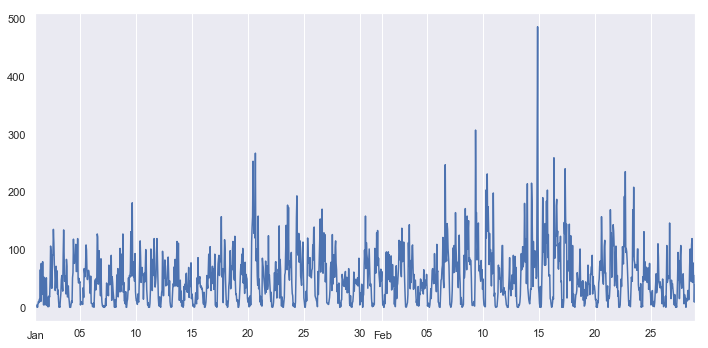

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches([10,5])
ax.set_xlim([min(df.index), max(df.index)])
ax.plot_date(df.index.to_pydatetime(), df.views, 'b-')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday = range(5,32,5)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.tight_layout()